# Presentación final Grupo 24
### Integrantes: Battaglino Ignacio - Marcos Santiago - Rosli Bautista - Kesselman Federico

## 1- ¿Cómo divimos el trabajo y cómo nos organizamos con el repositorio?
#### Inicio, Datos y Ranking: Bauti
#### Juego: Nacho
#### Estadísticas: Santi y Fede

## 2- ¿Qué herramientas fueron utilizadas?
#### IDE: vscode 
#### Librerías primera parte: jupyter , streamlit , Unidecode
#### Librerías segunda parte: streamlit, pandas, unidecode, matplotlib, folium , streamlit_folium , streamlit-autorefresh
#### Herramientas para trabajar colaborativamente: GitLab

## 3- ¿Qué complicaciones tuvimos a la hora de desarrollar la aplicación?
#### - Delay en el sign in, cuando no existían usuarios cargados
#### - Problema en la implementación de las dificultades en la temática de conectividad

## 4- ¿Cómo las solucionamos?
#### - Log in automático al registrarse 
#### - Implementación de un timer a la hora de jugar 

---

### 5- ACTIVIDAD 6 POR PYTHON PLUS


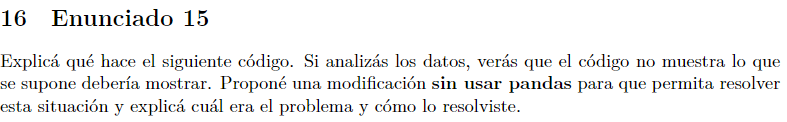

Veamos que hace el codigo proporcionado:

In [8]:
import csv

name_file = 'lagos_arg.csv'
with open(name_file, encoding='utf-8') as data_set:
    reader = csv.reader(data_set, delimiter=',')
    header, data = next(reader), reader

    pcias = ["Tierra del Fuego, Antártida e Islas del Atlántico Sur", "Buenos Aires"]
    
    for pcia in pcias:
        for row in data:
            if row[1] == pcia:
                print("El lago", row[0], "está en", pcia)


El lago Lago Yehuin está en Tierra del Fuego, Antártida e Islas del Atlántico Sur
El lago Lago Chepelmut está en Tierra del Fuego, Antártida e Islas del Atlántico Sur
El lago Lago Río Bueno está en Tierra del Fuego, Antártida e Islas del Atlántico Sur


Solucion propuesta:

In [9]:
import csv

name_file = 'lagos_arg.csv'
with open(name_file, encoding='utf-8') as data_set:
    reader = csv.reader(data_set, delimiter=',')
    header, data = next(reader), list(reader)  # Convertir el iterador a una lista

    pcias = ["Tierra del Fuego, Antártida e Islas del Atlántico Sur", "Buenos Aires"]
    
    for pcia in pcias:
        for row in data:
            if row[1] == pcia:
                print("El lago", row[0], "está en", pcia)


El lago Lago Yehuin está en Tierra del Fuego, Antártida e Islas del Atlántico Sur
El lago Lago Chepelmut está en Tierra del Fuego, Antártida e Islas del Atlántico Sur
El lago Lago Río Bueno está en Tierra del Fuego, Antártida e Islas del Atlántico Sur
El lago Lago Epecuén está en Buenos Aires


---